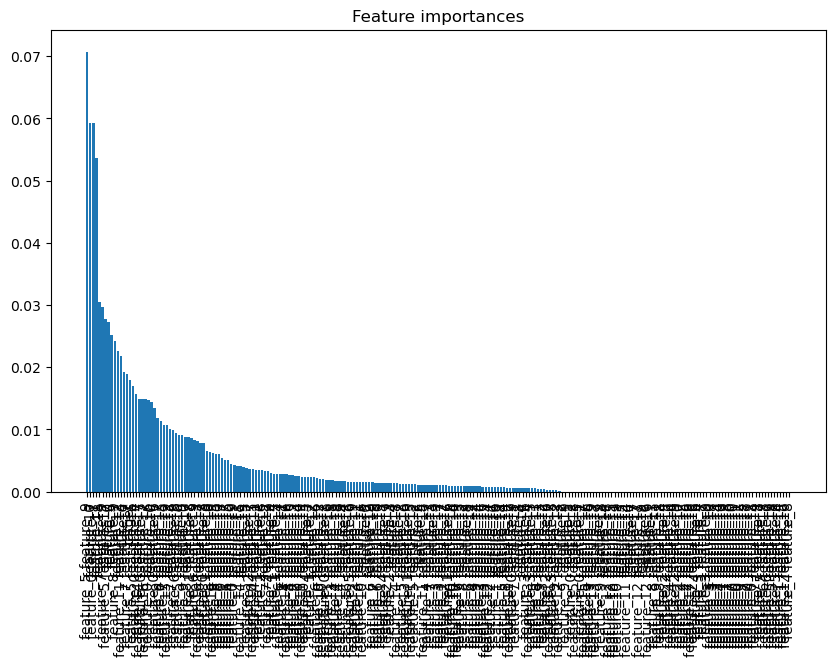

ValueError: Input X must be non-negative.

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Step 1: Generate the dataset
X, y = make_classification(
    n_samples=1000, 
    n_features=20, 
    n_informative=2, 
    n_redundant=10, 
    n_clusters_per_class=1, 
    weights=[0.99], 
    flip_y=0, 
    random_state=1
)

# Convert to DataFrame
df = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(X.shape[1])])
df['target'] = y

# Step 2: Feature Creation
# Create polynomial features
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
poly_features = poly.fit_transform(df.drop('target', axis=1))

# Convert polynomial features to DataFrame
poly_feature_names = poly.get_feature_names_out(df.columns[:-1])
df_poly = pd.DataFrame(poly_features, columns=poly_feature_names)

# Combine original and polynomial features
df_combined = pd.concat([df, df_poly], axis=1)

# Step 3: Feature Selection

# a. Feature Importance using Tree-based Models
model = RandomForestClassifier(random_state=1)
model.fit(df_combined.drop('target', axis=1), df_combined['target'])

# Get feature importances
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(df_combined.shape[1]-1), importances[indices])
plt.xticks(range(df_combined.shape[1]-1), df_combined.columns[indices], rotation=90)
plt.show()

# b. Recursive Feature Elimination (RFE)
rfe = RFE(estimator=model, n_features_to_select=10, step=1)
rfe.fit(df_combined.drop('target', axis=1), df_combined['target'])

# Get selected features
selected_features_rfe = df_combined.columns[:-1][rfe.support_]

# c. SelectKBest using Chi-Square
selector = SelectKBest(chi2, k=10)
selector.fit(df_combined.drop('target', axis=1), df_combined['target'])

# Get selected features
selected_features_kbest = df_combined.columns[:-1][selector.get_support()]

# Step 4: Model Building
# Split the data
X_train, X_test, y_train, y_test = train_test_split(df_combined.drop('target', axis=1), df_combined['target'], test_size=0.2, random_state=1)

# Baseline model using all features
model_baseline = RandomForestClassifier(random_state=1)
model_baseline.fit(X_train, y_train)
y_pred_baseline = model_baseline.predict(X_test)
print("Baseline Model Performance:\n", classification_report(y_test, y_pred_baseline))

# Model using RFE selected features
X_train_rfe = X_train[selected_features_rfe]
X_test_rfe = X_test[selected_features_rfe]
model_rfe = RandomForestClassifier(random_state=1)
model_rfe.fit(X_train_rfe, y_train)
y_pred_rfe = model_rfe.predict(X_test_rfe)
print("RFE Model Performance:\n", classification_report(y_test, y_pred_rfe))

# Model using SelectKBest selected features
X_train_kbest = X_train[selected_features_kbest]
X_test_kbest = X_test[selected_features_kbest]
model_kbest = RandomForestClassifier(random_state=1)
model_kbest.fit(X_train_kbest, y_train)
y_pred_kbest = model_kbest.predict(X_test_kbest)
print("SelectKBest Model Performance:\n", classification_report(y_test, y_pred_kbest))


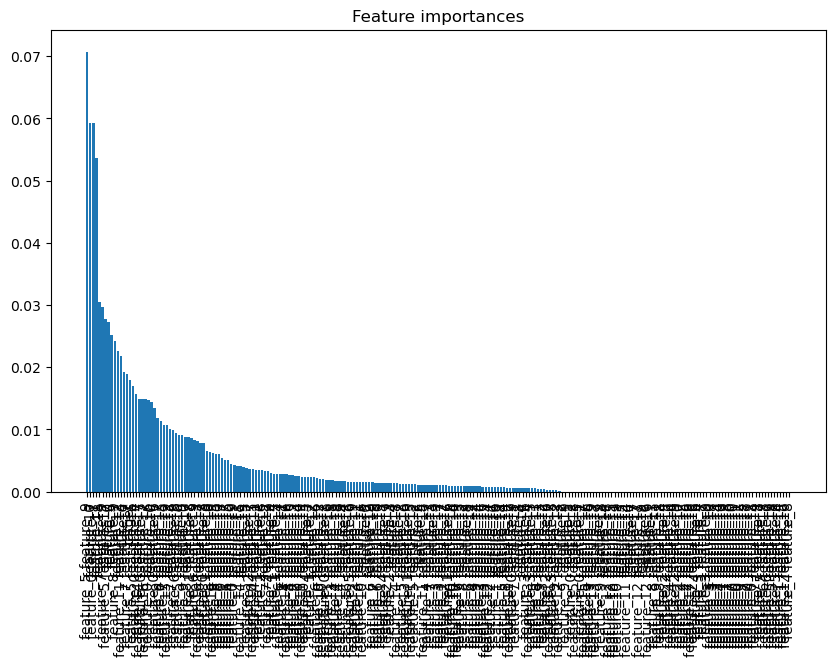

IndexError: boolean index did not match indexed array along dimension 0; dimension is 230 but corresponding boolean dimension is 229

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Step 1: Generate the dataset
X, y = make_classification(
    n_samples=1000, 
    n_features=20, 
    n_informative=2, 
    n_redundant=10, 
    n_clusters_per_class=1, 
    weights=[0.99], 
    flip_y=0, 
    random_state=1
)

# Convert to DataFrame
df = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(X.shape[1])])
df['target'] = y

# Step 2: Feature Creation
# Create polynomial features
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
poly_features = poly.fit_transform(df.drop('target', axis=1))

# Convert polynomial features to DataFrame
poly_feature_names = poly.get_feature_names_out(df.columns[:-1])
df_poly = pd.DataFrame(poly_features, columns=poly_feature_names)

# Combine original and polynomial features
df_combined = pd.concat([df, df_poly], axis=1)

# Normalize features to non-negative values for chi2
scaler = MinMaxScaler()
df_combined_scaled = pd.DataFrame(scaler.fit_transform(df_combined.drop('target', axis=1)), columns=df_combined.columns[:-1])
df_combined_scaled['target'] = df_combined['target']

# Step 3: Feature Selection

# a. Feature Importance using Tree-based Models
model = RandomForestClassifier(random_state=1)
model.fit(df_combined.drop('target', axis=1), df_combined['target'])

# Get feature importances
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(df_combined.shape[1]-1), importances[indices])
plt.xticks(range(df_combined.shape[1]-1), df_combined.columns[indices], rotation=90)
plt.show()

# b. Recursive Feature Elimination (RFE)
rfe = RFE(estimator=model, n_features_to_select=10, step=1)
rfe.fit(df_combined.drop('target', axis=1), df_combined['target'])

# Get selected features
selected_features_rfe = df_combined.columns[:-1][rfe.support_]

# c. SelectKBest using Chi-Square
selector = SelectKBest(chi2, k=10)
selector.fit(df_combined_scaled.drop('target', axis=1), df_combined_scaled['target'])

# Get selected features
selected_features_kbest = df_combined.columns[:-1][selector.get_support()]

# Step 4: Model Building
# Split the data
X_train, X_test, y_train, y_test = train_test_split(df_combined.drop('target', axis=1), df_combined['target'], test_size=0.2, random_state=1)

# Baseline model using all features
model_baseline = RandomForestClassifier(random_state=1)
model_baseline.fit(X_train, y_train)
y_pred_baseline = model_baseline.predict(X_test)
print("Baseline Model Performance:\n", classification_report(y_test, y_pred_baseline))

# Model using RFE selected features
X_train_rfe = X_train[selected_features_rfe]
X_test_rfe = X_test[selected_features_rfe]
model_rfe = RandomForestClassifier(random_state=1)
model_rfe.fit(X_train_rfe, y_train)
y_pred_rfe = model_rfe.predict(X_test_rfe)
print("RFE Model Performance:\n", classification_report(y_test, y_pred_rfe))

# Model using SelectKBest selected features
X_train_kbest = X_train[selected_features_kbest]
X_test_kbest = X_test[selected_features_kbest]
model_kbest = RandomForestClassifier(random_state=1)
model_kbest.fit(X_train_kbest, y_train)
y_pred_kbest = model_kbest.predict(X_test_kbest)
print("SelectKBest Model Performance:\n", classification_report(y_test, y_pred_kbest))


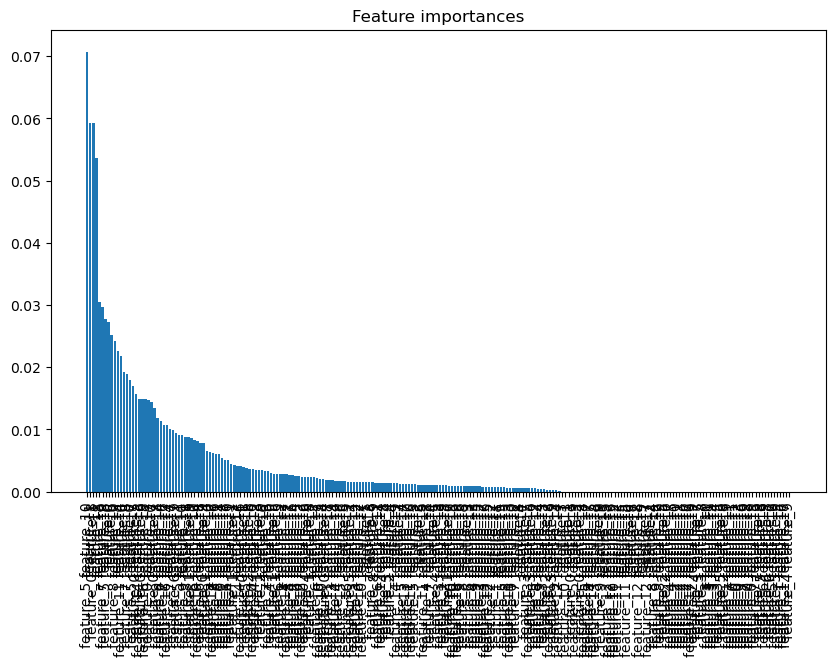

Baseline Model Performance:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       199
           1       0.33      1.00      0.50         1

    accuracy                           0.99       200
   macro avg       0.67      0.99      0.75       200
weighted avg       1.00      0.99      0.99       200

RFE Model Performance:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       199
           1       0.50      1.00      0.67         1

    accuracy                           0.99       200
   macro avg       0.75      1.00      0.83       200
weighted avg       1.00      0.99      1.00       200

SelectKBest Model Performance:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       199
           1       0.50      1.00      0.67         1

    accuracy                           0.99       200
   macro avg       0.75      1.00      0.83

In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Step 1: Generate the dataset
X, y = make_classification(
    n_samples=1000, 
    n_features=20, 
    n_informative=2, 
    n_redundant=10, 
    n_clusters_per_class=1, 
    weights=[0.99], 
    flip_y=0, 
    random_state=1
)

# Convert to DataFrame
df = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(X.shape[1])])
df['target'] = y

# Step 2: Feature Creation
# Create polynomial features
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
poly_features = poly.fit_transform(df.drop('target', axis=1))

# Convert polynomial features to DataFrame
poly_feature_names = poly.get_feature_names_out(df.columns[:-1])
df_poly = pd.DataFrame(poly_features, columns=poly_feature_names)

# Combine original and polynomial features
df_combined = pd.concat([df.drop('target', axis=1), df_poly], axis=1)
df_combined['target'] = df['target']

# Normalize features to non-negative values for chi2
scaler = MinMaxScaler()
df_combined_scaled = pd.DataFrame(scaler.fit_transform(df_combined.drop('target', axis=1)), columns=df_combined.columns[:-1])
df_combined_scaled['target'] = df_combined['target']

# Step 3: Feature Selection

# a. Feature Importance using Tree-based Models
model = RandomForestClassifier(random_state=1)
model.fit(df_combined.drop('target', axis=1), df_combined['target'])

# Get feature importances
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(df_combined.shape[1]-1), importances[indices])
plt.xticks(range(df_combined.shape[1]-1), df_combined.columns[indices], rotation=90)
plt.show()

# b. Recursive Feature Elimination (RFE)
rfe = RFE(estimator=model, n_features_to_select=10, step=1)
rfe.fit(df_combined.drop('target', axis=1), df_combined['target'])

# Get selected features
selected_features_rfe = df_combined.columns[:-1][rfe.support_]

# c. SelectKBest using Chi-Square
selector = SelectKBest(chi2, k=10)
selector.fit(df_combined_scaled.drop('target', axis=1), df_combined_scaled['target'])

# Get selected features
selected_features_kbest = df_combined_scaled.columns[:-1][selector.get_support()]

# Step 4: Model Building
# Split the data
X_train, X_test, y_train, y_test = train_test_split(df_combined.drop('target', axis=1), df_combined['target'], test_size=0.2, random_state=1)

# Baseline model using all features
model_baseline = RandomForestClassifier(random_state=1)
model_baseline.fit(X_train, y_train)
y_pred_baseline = model_baseline.predict(X_test)
print("Baseline Model Performance:\n", classification_report(y_test, y_pred_baseline))

# Model using RFE selected features
X_train_rfe = X_train[selected_features_rfe]
X_test_rfe = X_test[selected_features_rfe]
model_rfe = RandomForestClassifier(random_state=1)
model_rfe.fit(X_train_rfe, y_train)
y_pred_rfe = model_rfe.predict(X_test_rfe)
print("RFE Model Performance:\n", classification_report(y_test, y_pred_rfe))

# Model using SelectKBest selected features
X_train_kbest = X_train[selected_features_kbest]
X_test_kbest = X_test[selected_features_kbest]
model_kbest = RandomForestClassifier(random_state=1)
model_kbest.fit(X_train_kbest, y_train)
y_pred_kbest = model_kbest.predict(X_test_kbest)
print("SelectKBest Model Performance:\n", classification_report(y_test, y_pred_kbest))
